In [1]:
%%capture
!pip install gdown opencv-python mtcnn

In [2]:
!gdown --id 1wq1lukETKxf6_oBlnnVNZJtUmeXuAWOA

Downloading...
From: https://drive.google.com/uc?id=1wq1lukETKxf6_oBlnnVNZJtUmeXuAWOA
To: /content/workshop_1_assets.zip
100% 195k/195k [00:00<00:00, 56.2MB/s]


In [3]:
!unzip -q workshop_1_assets.zip

In [4]:
import numpy as np
import cv2
from mtcnn import MTCNN
import matplotlib.pyplot as plt

%matplotlib inline

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


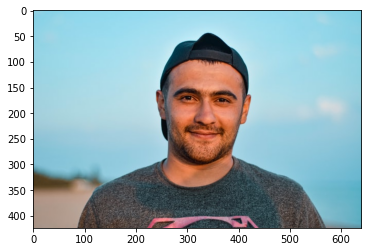

In [6]:
image = cv2.imread("human.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

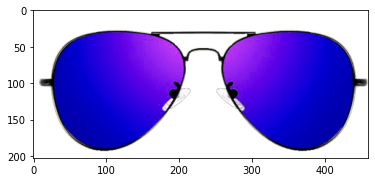

In [7]:
glasses = cv2.imread("sunglasses_blue.png", -1)
glasses = cv2.cvtColor(glasses, cv2.COLOR_BGRA2RGBA)
plt.imshow(glasses)

In [8]:
mtcnn = MTCNN()

In [9]:
faces = mtcnn.detect_faces(image)
faces

[{'box': [257, 95, 143, 196],
  'confidence': 0.9999998807907104,
  'keypoints': {'left_eye': (300, 171),
   'mouth_left': (300, 235),
   'mouth_right': (363, 241),
   'nose': (336, 215),
   'right_eye': (367, 175)}}]

In [10]:
face = faces[0]
face

{'box': [257, 95, 143, 196],
 'confidence': 0.9999998807907104,
 'keypoints': {'left_eye': (300, 171),
  'mouth_left': (300, 235),
  'mouth_right': (363, 241),
  'nose': (336, 215),
  'right_eye': (367, 175)}}

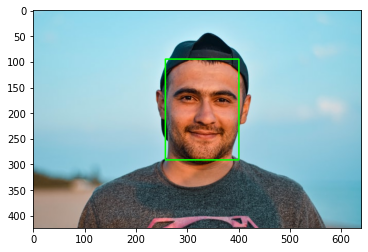

In [11]:
x, y, w, h = face['box']

temp_image = np.copy(image)

temp_image = cv2.rectangle(temp_image, (x, y), (x+w, y+h), (0, 255, 0), 2)

plt.imshow(temp_image)

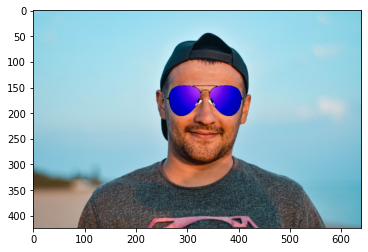

In [12]:
background = np.copy(image)
img_filter = np.copy(glasses)

(x1, y1) , (x2, y2) = (face['keypoints']['left_eye'], face['keypoints']['right_eye'])

x1 -= 45
y1 -= 35
x2 += 45
y2 += 35


h = y2 - y1
w = x2 - x1

img_filter = cv2.resize(img_filter, (w, h))

alpha_filter = img_filter[:, :, 3] / 255.0
alpha_background = 1.0 - alpha_filter

for c in range(0, 3):
    background[y1:y2, x1:x2, c] = (alpha_filter * img_filter[:, :, c] +
                              alpha_background * background[y1:y2, x1:x2, c])



plt.imsave("final_image.png", background)
plt.imshow(background)

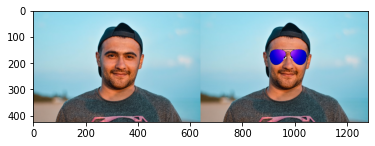

In [14]:
snapchat_filter = np.hstack((image, background))

plt.imsave("snapchat_filter.png", snapchat_filter)
plt.imshow(snapchat_filter)